In [1]:
import numpy as np
import pandas as pd 
file_name = 'nursery.data'
df=pd.read_csv(file_name)
b= pd.DataFrame(df)
b

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [3]:
a=b.values
X=a[:,:7]   
y=a[:,-1]
print(X[1])
print(y)

['usual' 'proper' 'complete' '1' 'convenient' 'convenient' 'nonprob']
['priority' 'not_recom' 'recommend' ... 'spec_prior' 'spec_prior'
 'not_recom']


In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X[:,0]= LE.fit_transform(X[:,0])
X[:,1]= LE.fit_transform(X[:,1])
X[:,2]= LE.fit_transform(X[:,2])
X[:,3]= LE.fit_transform(X[:,3])
X[:,4]= LE.fit_transform(X[:,4])
X[:,5]= LE.fit_transform(X[:,5])
X[:,6]= LE.fit_transform(X[:,6])
y= LE.fit_transform(y)




In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X)
X_scale=scaler.transform(X)
print(X)

[[2 3 0 ... 0 0 0]
 [2 3 0 ... 0 0 0]
 [2 3 0 ... 0 0 2]
 ...
 [0 4 2 ... 1 1 1]
 [0 4 2 ... 1 1 1]
 [0 4 2 ... 1 1 1]]


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [7]:
from sklearn.svm import SVC # SVM 
svclassifier = SVC(C=1,kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [8]:
y_pred = svclassifier.predict(X_test)


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,zero_division=0))

[[ 70 418 350   0]
 [ 86 511 288   0]
 [ 68 222 502   0]
 [  7  68   2   0]]
              precision    recall  f1-score   support

           0       0.30      0.08      0.13       838
           1       0.42      0.58      0.49       885
           3       0.44      0.63      0.52       792
           4       0.00      0.00      0.00        77

    accuracy                           0.42      2592
   macro avg       0.29      0.32      0.28      2592
weighted avg       0.38      0.42      0.37      2592



In [16]:
Y1 = LE.inverse_transform(y_test)
Y2 = LE.inverse_transform(y_pred)
df=pd.DataFrame({'Actual':Y1, 'Predicted':Y2})
df

,Actual,Predicted
0,not_recom,priority
1,priority,priority
2,not_recom,spec_prior
3,priority,spec_prior
4,priority,priority
...,...,...
2587,spec_prior,spec_prior
2588,spec_prior,spec_prior
2589,priority,priority
2590,not_recom,priority


In [17]:
from sklearn.naive_bayes import BernoulliNB  # NB
model = BernoulliNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,zero_division=0))

[[119 458 261   0]
 [145 609 131   0]
 [107 239 446   0]
 [  0  77   0   0]]
              precision    recall  f1-score   support

           0       0.32      0.14      0.20       838
           1       0.44      0.69      0.54       885
           3       0.53      0.56      0.55       792
           4       0.00      0.00      0.00        77

    accuracy                           0.45      2592
   macro avg       0.32      0.35      0.32      2592
weighted avg       0.42      0.45      0.41      2592



In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,zero_division=0))

[[125 369 338   6]
 [439 361  73  12]
 [385  50 357   0]
 [ 42  35   0   0]]
              precision    recall  f1-score   support

           0       0.13      0.15      0.14       838
           1       0.44      0.41      0.42       885
           3       0.46      0.45      0.46       792
           4       0.00      0.00      0.00        77

    accuracy                           0.33      2592
   macro avg       0.26      0.25      0.25      2592
weighted avg       0.33      0.33      0.33      2592



In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()   
regressor.fit(X_train, y_train)   # fit
y_pred = regressor.predict(X_test)


df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 1.1001266337180977
Mean Squared Error: 1.6295264992935437


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([Dense(32, activation='relu', input_shape=(7,)),
                    Dense(32, activation='relu'),  
                    Dense(1, activation='softmax'),])
# structure neural network : input layer( size =7) , hidden layer 1 ( size 32),hidden 2 ( size 32) , output 
# relu function : Rectified Linear Unit ,
model.compile(optimizer='sgd',  # stochastic gradient descent, với multip-class classification nên dùng 
              loss='binary_crossentropy',   
              metrics=['accuracy'])
         #dung binary_crossentropy thi ra loss nAN
X_train=np.asarray(X_train).astype(np.float64)   # chuyen thanh float tranh loi 
y_train=np.asarray(y_train).astype(np.float64) 
X_test=np.asarray(X_test).astype(np.float64) 
y_test=np.asarray(y_test).astype(np.float64)     
hist = model.fit(X_train, y_train, epochs=100,batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
324/324 [==============================] - 1s 2ms/step - loss: -5.5543 - accuracy: 0.3261 - val_loss: -5.7479 - val_accuracy: 0.3414
Epoch 2/100
324/324 [==============================] - 1s 2ms/step - loss: -5.5543 - accuracy: 0.3261 - val_loss: -5.7479 - val_accuracy: 0.3414
Epoch 3/100
324/324 [==============================] - 1s 2ms/step - loss: -5.5543 - accuracy: 0.3261 - val_loss: -5.7479 - val_accuracy: 0.3414
Epoch 4/100
324/324 [==============================] - 0s 1ms/step - loss: -5.5543 - accuracy: 0.3261 - val_loss: -5.7479 - val_accuracy: 0.3414
Epoch 5/100
324/324 [==============================] - 0s 1ms/step - loss: -5.5543 - accuracy: 0.3261 - val_loss: -5.7479 - val_accuracy: 0.3414
Epoch 6/100
324/324 [==============================] - 0s 1ms/step - loss: -5.5543 - accuracy: 0.3261 - val_loss: -5.7479 - val_accuracy: 0.3414
Epoch 7/100
324/324 [==============================] - 0s 1ms/step - loss: -5.5543 - accuracy: 0.3261 - val_loss: -5.7479 - val_ac

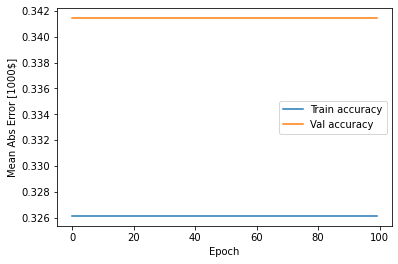

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')
plt.plot(hist.epoch, np.array(hist.history['accuracy']), label='Train accuracy')
plt.plot(hist.epoch, np.array(hist.history['val_accuracy']), label = 'Val accuracy')
plt.legend()